### Codigo Auxiliar

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def senoidal(tini, tfin, fm, fs, fase):
    t = np.linspace(tini,tfin,fm * (tfin - tini), endpoint=False)
    return t, np.sin(2 * np.pi * fs * t + fase)

def sinc(tini, tfin, fm, fs, fase):
    t = np.linspace(tini, tfin, fm * (tfin - tini), endpoint=False)
    x = 2 * np.pi * fs * t + fase
    return t, np.where(np.equal(x, [0]*len(x)), 1, np.sin(x) / x)

# Guia 1
## Ejercicio 6
Genere una señal discreta con frecuencia de meustreo de 10 Hz y sobremuestreela, mediante distintos tipos de interpoladores, a 4 veces la frecuencia de muestreo. Para esto, implemente la siguiente ecuación de interpolación:
$$x_i(mT_i) = \sum_{n} x(nT)I \left( \frac{mT_i-nT}{T} \right)$$
donde $I$ es la función interpolante (la función sinc, por ejemplo). Observe que $T$ representa el período de meustreo original y $T_i$ el nuevo período de muestreo. Note además que $n$ y $m$ indican el número de muestra en la señal original e interpolada, respectivamente y que, si bien aquí se expresan como señales analógicas, $x$ y $x_i$ serán señales discretas en su implementación (es decir, $x_i[m]$ y $x[n]$). PAra la función sinc tenga en cuenta la definición dada en el primer ejercicio, con $f_s=0.5$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

''' Iescalon
funcion de interpolacion escalon
'''
def Iescalon(t):
    # TODO: corregir el solapamiento
    return 1 if t >= 0 and t < 1 else 0
    # forma vectorial
    return np.where(\
        np.logical_and(\
            np.greater_equal(t, [0]*len(t)),\
            np.less(t, [1]*len(t))\
        ),\
        1,\
        0\
    )

''' Ilineal
funcion de interpolacion lineal
'''
def Ilineal(t):
    return 1 - abs(t) if abs(t) < 1 else 0
    # forma vectorial
    return np.where(\
        np.less(np.abs(t), [1]*len(t)),\
        1-np.abs(t),\
        0\
    )

''' Isinc
function de interpolacion sinc
'''
def Isinc(t):
    return np.sin(t)/t if t != 0 else 1
    # forma vectorial
    return np.where(\
        np.not_equal(t, [0]*len(t)),\
        np.divide(np.sin(t),t),
        1
    )

''' interpolar
I: funcion de interpolacion
tviejo: vector de muestras
s: vector de valores
ratio: relacion fm_nueva/fm_vieja (>=1)
'''
def interpolar(I, tviejo, s, ratio):
    # capturar caso ratio <= 1
    if(ratio <= 1):
        return tviejo[:],s[:]

    # inferir periodo viejo
    Tviejo = tviejo[1] - tviejo[0]

    # calcular muestreo nuevo
    tini = tviejo[0]
    tfin = tviejo[len(tviejo)-1]+Tviejo
    fm = int(len(tviejo) * ratio / (tfin - tini))
    T = 1.0/fm
    t = np.linspace(tini, tfin, int(fm*(tfin-tini)), endpoint=False)

    #print(f"tini: {tini}, tfin: {tfin}, fm: {fm}, T: {T}")

    # interpolar
    snueva = [0]*len(t)
    for i in range(len(t)):
        for j in range(len(tviejo)):
            snueva[i] = snueva[i] + s[j] * I((t[i] - tviejo[j]) / Tviejo)
    return t, snueva

### Caso 1
Señal sinusoidal de frecuencia 1Hz y frecuencia muestral 10 Hz

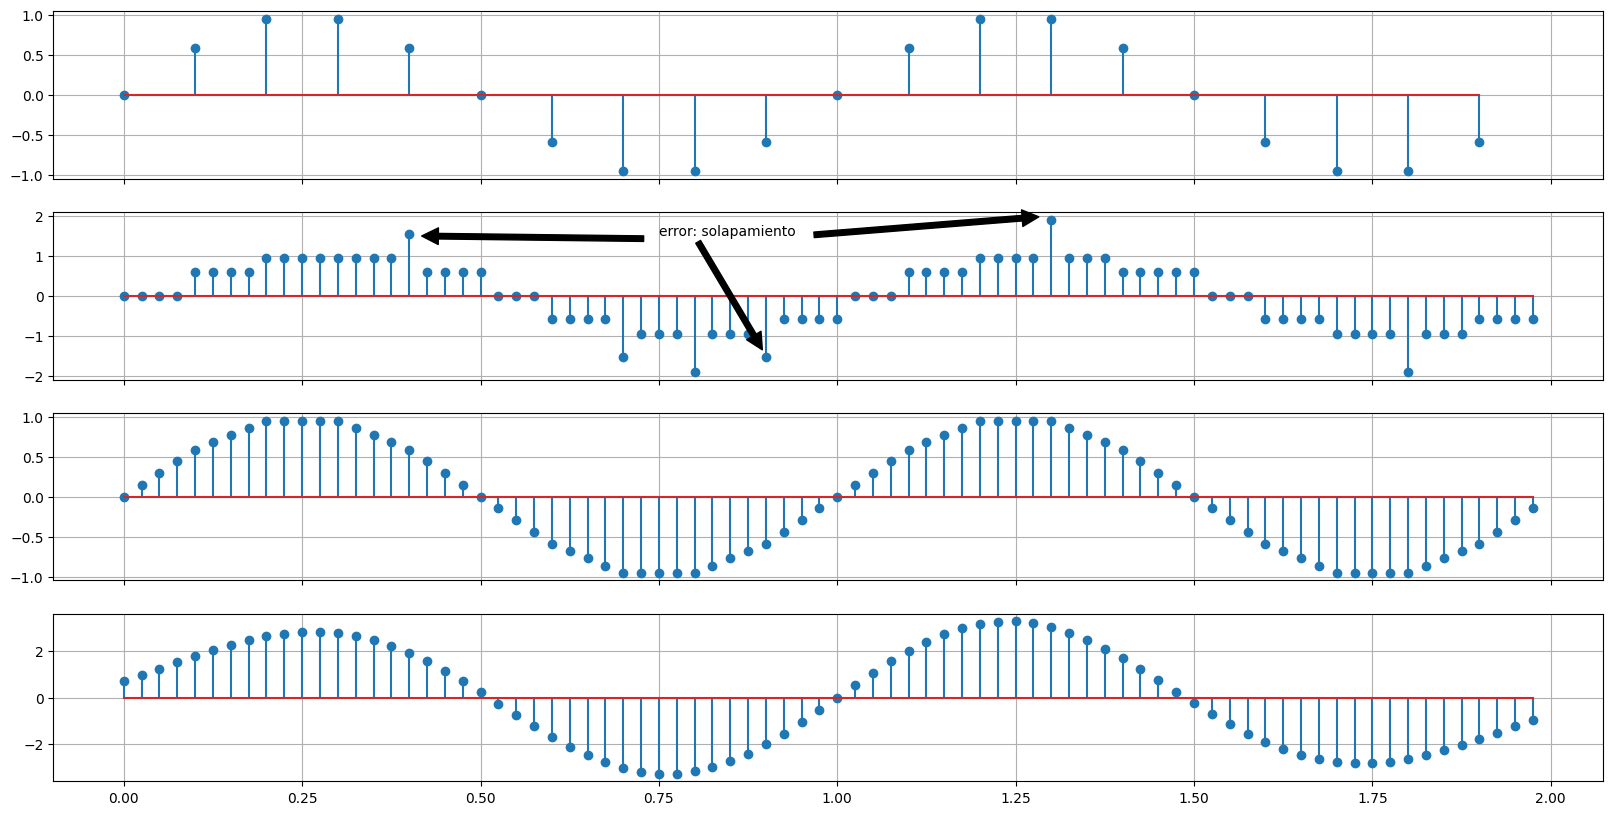

In [3]:
t,s = senoidal(0,2,10,1,0)
sesc = interpolar(Iescalon, t, s, 4)
slin = interpolar(Ilineal, t, s, 4)
ssinc = interpolar(Isinc, t, s, 4)

fig, ax = plt.subplots(4,sharex=True)
fig.set_figwidth(20)
fig.set_figheight(10)

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[0].stem(t,s)
ax[1].stem(sesc[0],sesc[1])
ax[2].stem(slin[0],slin[1])
ax[3].stem(ssinc[0],ssinc[1])

# marcar errores
ax[1].annotate('error: solapamiento', xy=(0.4, 1.5), xytext=(0.75, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax[1].annotate('', xy=(0.9, -1.5), xytext=(0.8, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax[1].annotate('', xy=(1.3, 2), xytext=(0.95, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.show()

### Caso 2
Señal sinusoidal de frecuencia 2Hz y frecuencia muestral 10 Hz
> Con una señal de mayor frecuencia (menor relacion $fm/fs$) da peores resultados

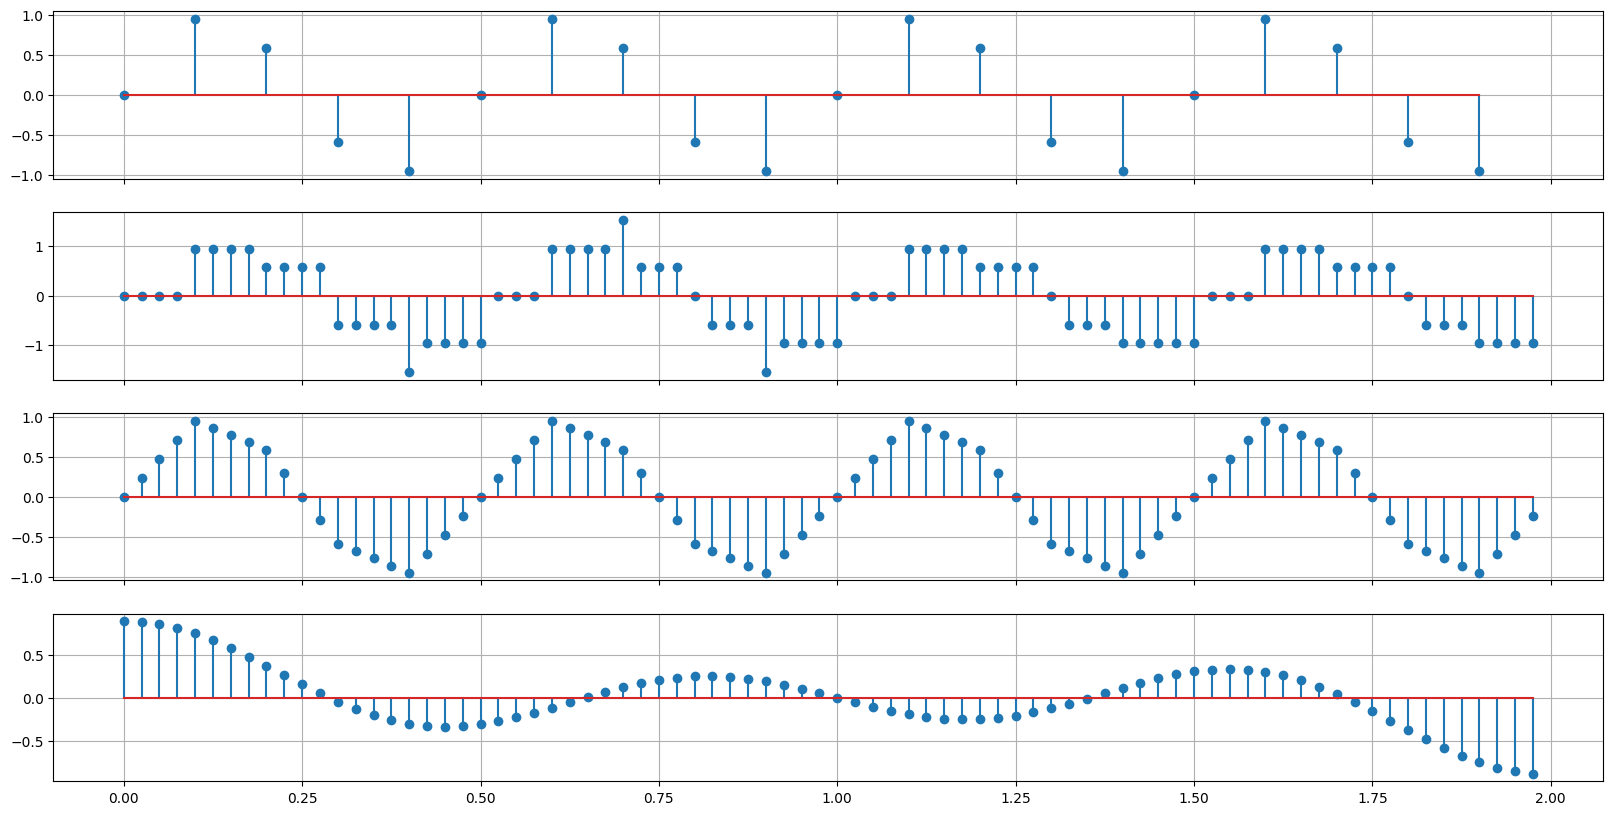

In [4]:
t,s = senoidal(0,2,10,2,0)
sesc = interpolar(Iescalon, t, s, 4)
slin = interpolar(Ilineal, t, s, 4)
ssinc = interpolar(Isinc, t, s, 4)

fig, ax = plt.subplots(4,sharex=True)
fig.set_figwidth(20)
fig.set_figheight(10)

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[0].stem(t,s)
ax[1].stem(sesc[0],sesc[1])
ax[2].stem(slin[0],slin[1])
ax[3].stem(ssinc[0],ssinc[1])

plt.show()

### Caso 3
Señal sinusoidal de frecuencia 2Hz y frecuencia muestral 20 Hz
> Aumentamos la frecuencia muestral y mejora la interpolacion

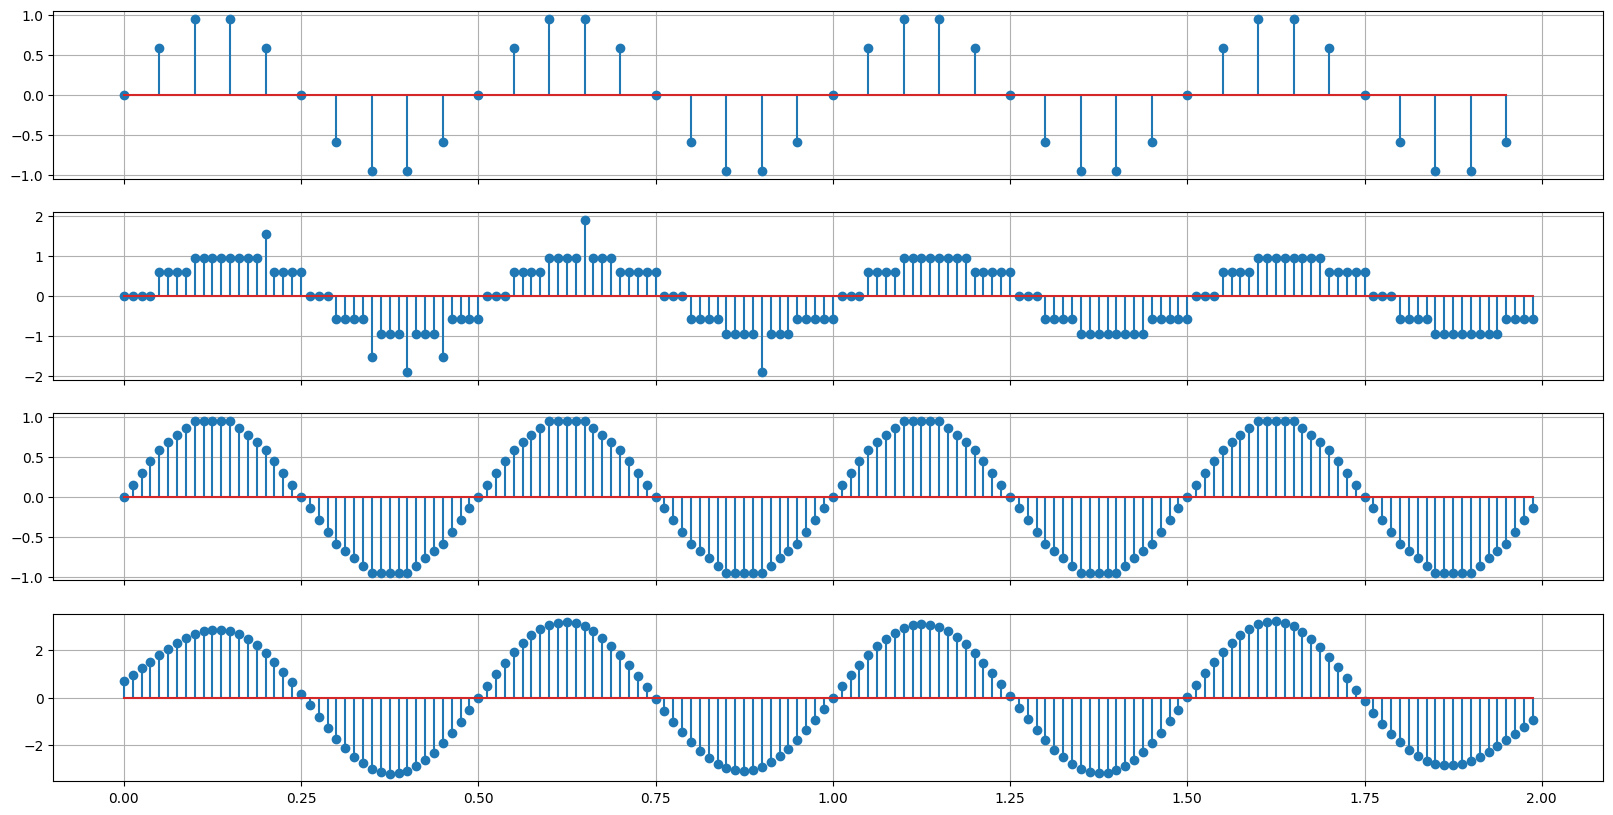

In [5]:
t,s = senoidal(0,2,20,2,0)
sesc = interpolar(Iescalon, t, s, 4)
slin = interpolar(Ilineal, t, s, 4)
ssinc = interpolar(Isinc, t, s, 4)

fig, ax = plt.subplots(4,sharex=True)
fig.set_figwidth(20)
fig.set_figheight(10)

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[0].stem(t,s)
ax[1].stem(sesc[0],sesc[1])
ax[2].stem(slin[0],slin[1])
ax[3].stem(ssinc[0],ssinc[1])

plt.show()